## Test pour le regroupement des images de Vénus

* importer les images
* redimensionner 
* analyse en composantes principales

In [1]:
#Import libraires

import matplotlib.pyplot as plt
from matplotlib import offsetbox
import timeit
import numpy as np
import re
import cv2
import os
from time import time
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors, )
from sklearn.cluster import AgglomerativeClustering

In [2]:
def import_img(path_in):
    
    images=[]
    fnames=[]
    for root, dirs, fichiers in os.walk(path_in):
        for f in fichiers:
            if f.endswith('.jpg'):
                filepath = os.path.join(root, f)
                img = cv2.imread(filepath)
                if img is not None:
                    images.append(img)
                    fnames.append(f)
    
    if len(images) == len(fnames):
        print('Number of images : ' + str(len(images)))
    else:
        print('Error in importation: images and file\'s name are not corresponding ')
    
    return images, fnames

In [4]:
images, fnames = import_img(path_in = ' ')

Number of images : 175


In [5]:
def resize(images, size:int):
    
    dsize = (size, size)
    res=[]
    for i in images:
        res.append(cv2.resize(i, dsize))
        
    ncols= 4 #round(len(res)/5)
    nrows= 4 #round(len(res)/5)
    fig=plt.figure(figsize=(10, 10))
    for i in range(1, ncols*nrows +1):
        fig.add_subplot(nrows, ncols, i)
        fig.suptitle('Thumbnail of ' + str((ncols*nrows)) +
                     ' images resized on ' + str(len(res)) + ' available ' , fontsize=16)
        img = cv2.cvtColor(res[i-1], cv2.COLOR_BGR2RGB)
        plt.xticks([]), plt.yticks([])
        plt.axis('off')
        plt.imshow(img)
    plt.show()
    
    if plt is None:
        print('Error')
    
    return res

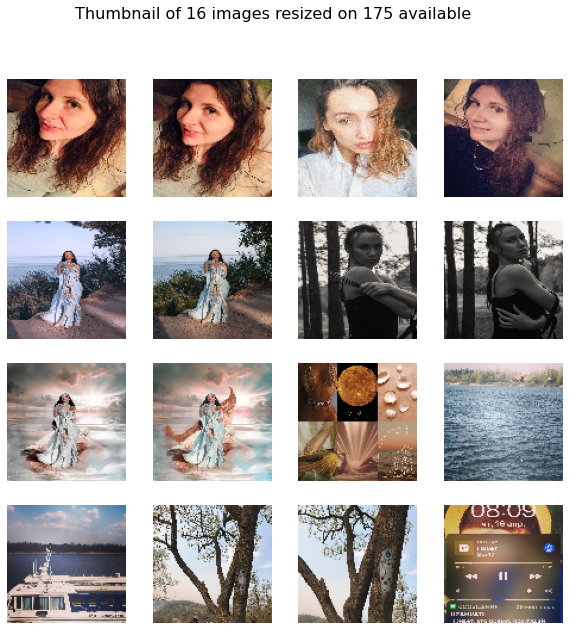

In [6]:
img = resize(images, 100)

In [7]:
def prep(images, labels):
    
    files=[]
    for i in labels:
        #files.append(i[:-4]) #if you have not labeled your data, you may use the file's name
        files.append(re.sub('2', ' ',i[:2]))
    y = np.array(files)
    
    X = np.zeros((len(images),len(images[0].ravel())))
    for i in range(len(images)):
        X[i,]=images[i].ravel()
    
    if len(X) == len(y):
        print('Data are ready !')
    else:
        print('Error process : verify inputs and function ')
    
    return X, y

In [8]:
X, y = prep(images=img, labels= fnames)

Data are ready !


In [9]:
def plotA(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(26, 18))
    ax = plt.subplot(111)
    #for i in range(X.shape[0]):
        #plt.text(X[i, 0], X[i, 1], str("."),
                 #color=plt.cm.Set1(0/ 10.),
                 #fontdict={'weight': 'bold', 'size': 20})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
       # shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            #dist = np.sum((X[i] - shown_images) ** 2, 1)
           # if np.min(dist) < 1e-10:
                # don't show points that are too close
           #     continue
           # shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)),
                X[i], pad=0,frameon=False)
            ax.add_artist(imagebox)

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        
    #plt.savefig("ACP_Kiyv.svg")

In [10]:
def plotB(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(16, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 #color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    
    #plt.savefig("ACP_KiyvLabel.svg")

In [11]:
def plotC(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(16, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], c='r', alpha=0.5)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        

Computing PCA projection


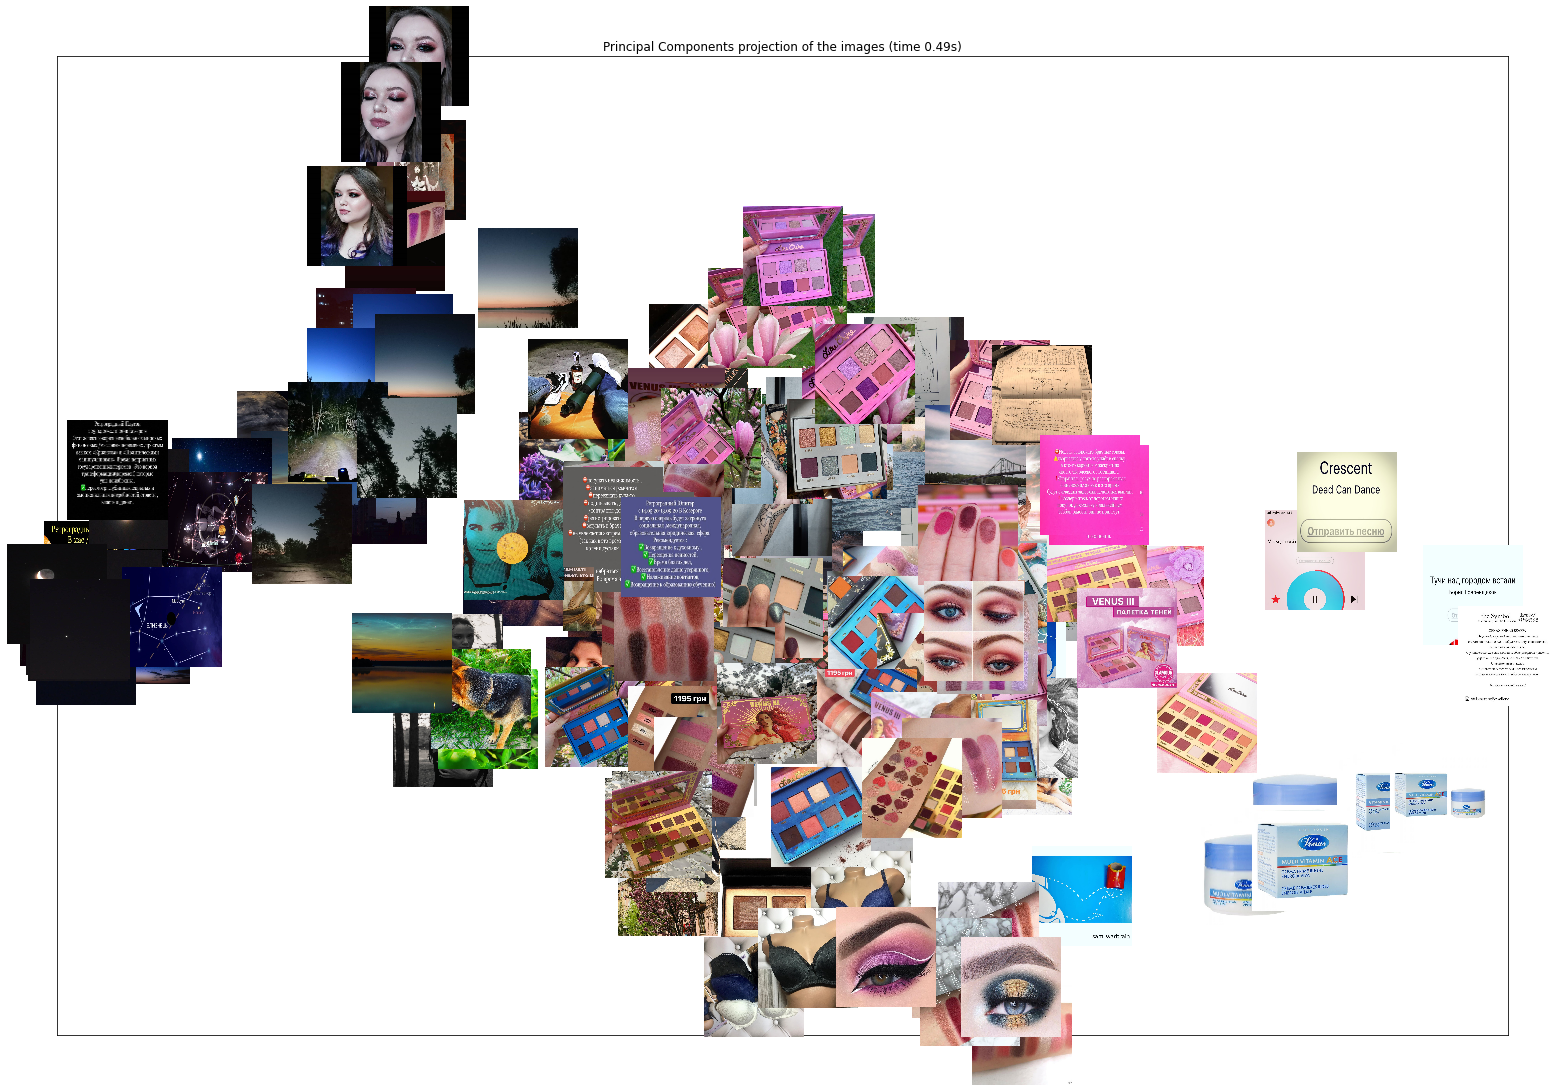

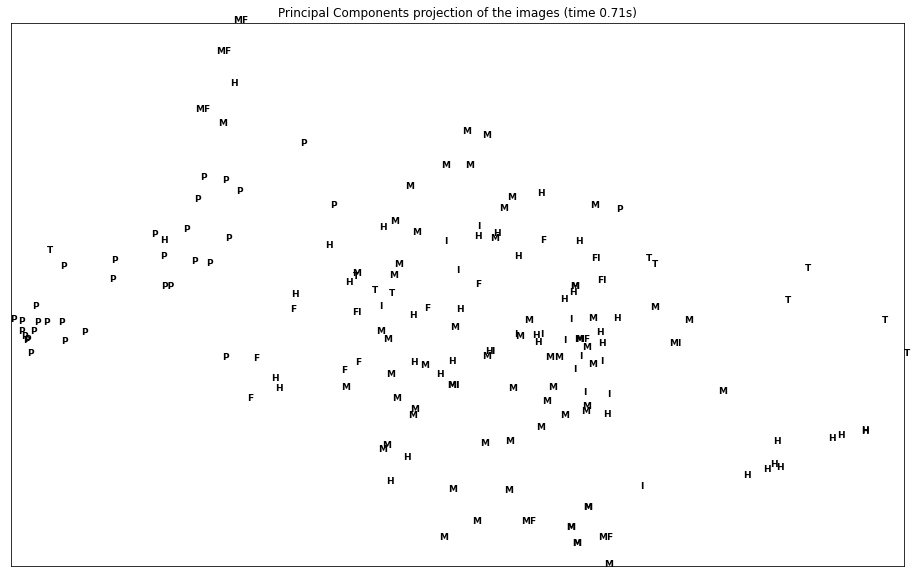

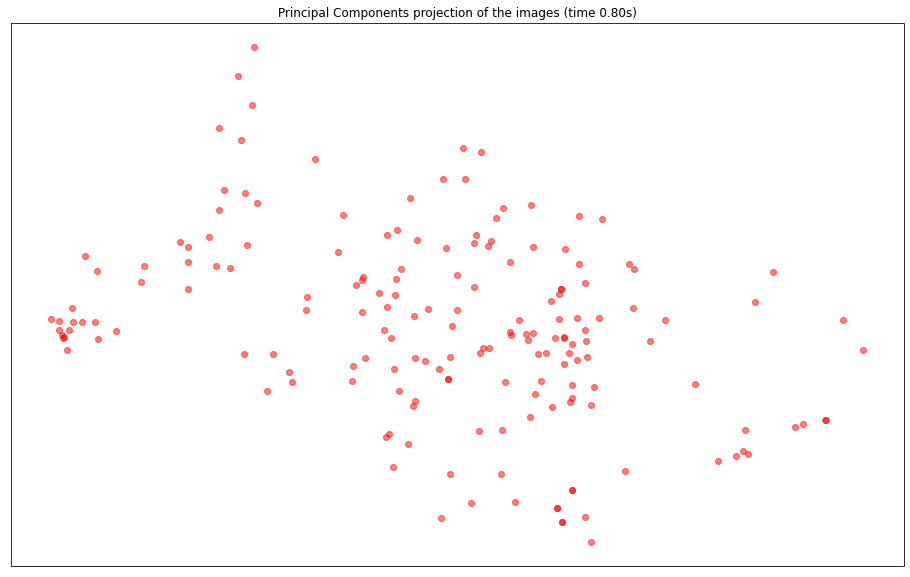

In [12]:
# Projection en composantes principales

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)

plotA(X_pca,
    "Principal Components projection of the images (time %.2fs)" %
    (time() - t0))
plotB(X_pca,
    "Principal Components projection of the images (time %.2fs)" %
    (time() - t0))
plotC(X_pca,
    "Principal Components projection of the images (time %.2fs)" %
    (time() - t0))